# What is a Random Forest?

## Introduction

### Random Forest is a machine learning algorithm that can be used for both classification and regression tasks. It works by building many individual decision trees and combining their results. This method helps to improve accuracy and reduce the chances of overfitting. Because of its robustness and versatility, Random Forest is commonly used in real-world problems like credit scoring, medical diagnosis, and predicting customer behavior.






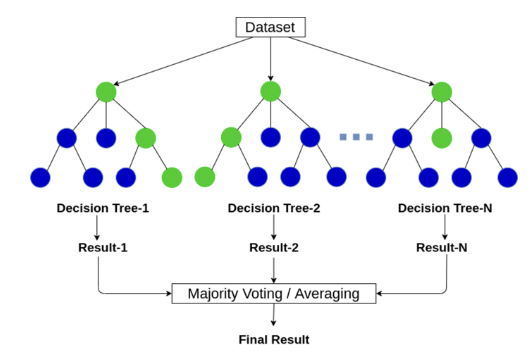

## How Random Forest Works

### The main idea behind a Random Forest is to create a “forest” of decision trees, where each tree is trained on a random subset of the data using a technique called bagging (bootstrap aggregating). When a prediction is made, each tree gives a result, and the forest chooses the majority vote (for classification) or average (for regression) as the final prediction. This randomness (both in data samples and in feature selection) makes each tree slightly different and helps the forest as a whole be more accurate and stable than a single decision tree.

## Key Concepts

*   Bagging: Random samples (with replacement) are drawn from the dataset to train each tree, which helps reduce variance
*   Feature Randomness: When splitting nodes, each tree only looks at a random subset of features, adding another layer of diversity
*   Ensemble Learning: By combining multiple models (trees), the Random Forest can make more accurate predictions



## Advantages and Limitations

### Advantages

*   High accuracy and performance, even without much parameter tuning
*   Reduces overfitting compared to a single decision tree
*   Works well with both numerical and categorical data
*   Can handle missing values and large datasets efficiently

### Limitations

*   Can be slower to predict when there are many trees
*   Less interpretable than a single decision tree
*   Larger memory usage due to storing many trees

## Important Parameters

*   Number of Trees (n_estimators): More trees usually improve performance but also increase computation time

*   Max Depth: Limits how deep each tree can grow. Helps avoid overfitting

*   Max Features: Controls the number of features to consider at each split

*   Min Samples Split/Leaf: Controls how sensitive the tree is to small changes in data


# Random Forests in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

filename = "/Users/maciek/Downloads/diabetes_dataset_with_notes.csv"

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 42,
    class_weight = {0: 1, 1: 2},
    max_depth = 4
)
rf.fit(X_train_balanced, y_train_balanced)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.73485
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83     18297
           1       0.24      0.97      0.38      1703

    accuracy                           0.73     20000
   macro avg       0.62      0.84      0.61     20000
weighted avg       0.93      0.73      0.79     20000



# Visualizing Results

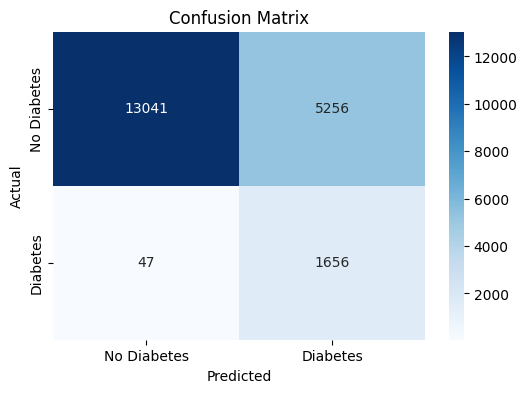

In [2]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### This shows how well the model predicted who has diabetes and who doesn't.

*   True Positives - 1656 people with diabetes were correctly predicted to have it.
*   True Negatives - 13041 people without diabetes were correctly predicted to not have it.
*   False Positives - 5256 people without diabetes were wrongly predicted to have it.
*   False Negatives - 47 people with diabetes were wrongly predicted to not have it.

### The model is really good at identifying people with diabetes (97.24% accuracy), but it's a bit less accurate at finding those without diabetes (71.27% accuracy).

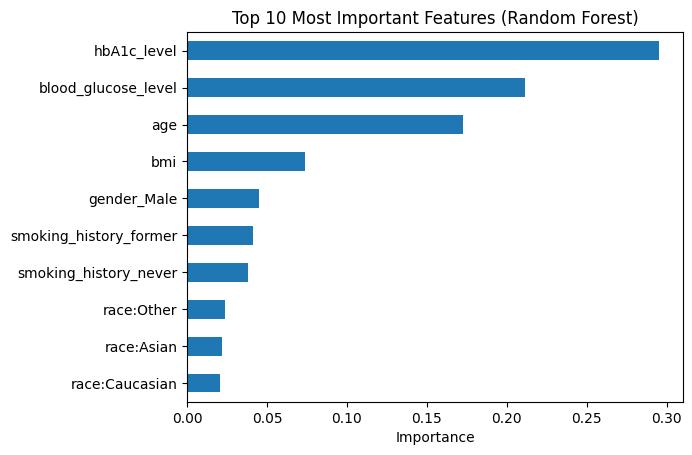

In [3]:
feature_importances = pd.Series(rf.feature_importances_, index = X.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

*   The top features are mostly how much sugar is in someone's blood (hbA1c and blood glucose)
*   Age is another feature behind sugar in one's blood, followed by age, bmi, gender, smoking, and race

### This model relies heavily on sugar in a person's blood when deciding if they have diabetes. This is ideal, as the model is picking up patterns that reflect personal health behavior directly.


## How max_depth effects Model Recall and Accuracy

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes (1).csv


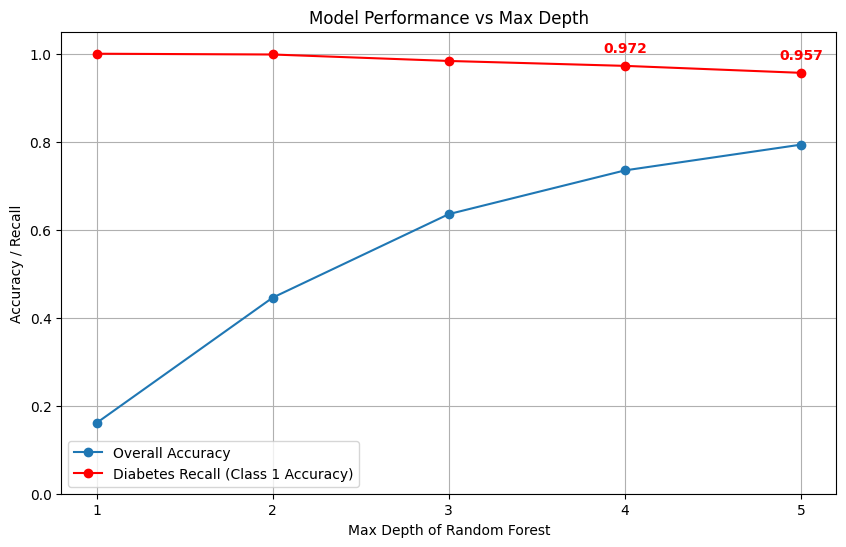

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

depths = list(range(1, 6))
overall_accuracies = []
diabetes_recalls = []

for depth in depths:
    clf = RandomForestClassifier(random_state = 42, n_estimators = 100, max_depth = depth, class_weight = {0: 1, 1: 2})
    clf.fit(X_train_balanced, y_train_balanced)
    y_pred = clf.predict(X_test)

    overall_acc = accuracy_score(y_test, y_pred)
    overall_accuracies.append(overall_acc)

    diabetes_rec = recall_score(y_test, y_pred, pos_label = 1)
    diabetes_recalls.append(diabetes_rec)

plt.figure(figsize = (10, 6))

plt.plot(depths, overall_accuracies, marker = 'o', label = 'Overall Accuracy')
plt.plot(depths, diabetes_recalls, marker = 'o', label = 'Diabetes Recall (Class 1 Accuracy)', color = 'red')

for i in [3, 4]:
    plt.annotate(f"{diabetes_recalls[i]:.3f}",
                 (depths[i], diabetes_recalls[i]),
                 textcoords = "offset points",
                 xytext = (0, 10),
                 ha = 'center',
                 color = 'red',
                 fontsize = 10,
                 fontweight = 'bold')

plt.xlabel('Max Depth of Random Forest')
plt.ylabel('Accuracy / Recall')
plt.title('Model Performance vs Max Depth')
plt.xticks(depths)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.show()

### Based on this data, as the max depth of the trees within the random forest increases, the model's accuracy in predicting someone having diabetes or not having diabetes increase, but the model's accuracy in predicting diabetes alone decreases. With max depth 4 the random forest classifier outperforms the decision tree that has max depth 5, but also outperforms the decision tree with max depth 4.